In [1]:
import sys
import os
sys.path.append(os.path.abspath('../../PRECISE-/modules/'))

from Precise import Precise
from boruta_analysis import BorutaAnalyzer
from shap_analysis import SHAPVisualizer
from reinforcement_learning import ReinforcementLearningAnalyzer
from prediction_analysis import PredictionAnalyzer
import anndata as ad
import scanpy as sc
import random



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


#### Importing the data and Initializing a Precise object

In [2]:
adata = ad.read_h5ad("../examples/sample_melanoma_adata.h5ad")
## Continue with preprocessing adata...
output_dir = "../results/"


In [3]:
adata

AnnData object with n_obs × n_vars = 1200 × 10082
    obs: 'ID', 'patient_number', 'time', 'sample_number', 'sample_name', 'response', 'cluster', 'T cells', 'CD4 helper T cells', 'CD8 Cytotoxic T cells', 'Regulatory T cells', 'Regulatory CD4 T cells', 'Regulatory CD8 T cells', 'Regulatory CD4 CD8 T cells', 'NKT cells', 'NK cells', 'B cells', 'Activated T cells', 'Senescence T cells', 'Terminal effector', 'Exhausted T cells', 'Stem like T cells', 'Memory T cells', 'Memory CD4 T cells', 'Memory CD8 T cells', 'Memory CD4 CD8 T cells', 'Macrophage immature', 'Macrophage mature', 'Monocyte immature', 'Monocyte mature', 'cDCs dendritic cells', 'pDCs', 'myeloid cells general immature', 'myeloid cells general mature', 'Neutrophils', 'Granolocytes', 'Double negative ', 'sample', 'prediction', 'proba_prediction'
    uns: 'cell_types'

The anndata object needs to contain in the .obs dataframe a columns with a response columns and a sample name column. These need to match the names passed to Precise in target_columns, and sample_column
The resposne columns has to contains 0s and 1s or 'R' 'NR'.

In [24]:
precise = Precise(
    adata,
    model_name='XGBoostClassifier',
    output_dir=output_dir,
    target_column="response",  # Adjust based on your dataset
    sample_column="sample"
)

#### Running a leave-one-out prediction on the samples
This result in a score for each sample, and a total AUC score. Feature importance will be automatically saved per fold (for models supporting it)

In [5]:
prediction_results = precise.cv_prediction()
sample_results, auc, estimators = prediction_results

In [6]:
sample_results

,Fold,Sample,Label,Score
0,1,Post_P1,1.0,0.12
1,2,Post_P1_2,0.0,0.24
2,3,Post_P2,0.0,0.20
3,4,Post_P3,0.0,0.12
4,5,Post_P3_2,0.0,0.48
5,6,Post_P4,1.0,0.48
6,7,Post_P5,0.0,0.32
7,8,Post_P5_2,1.0,0.12
8,9,Post_P6,0.0,0.04
9,10,Post_P7,1.0,0.20


Intersection plot saved to ../results/plots.


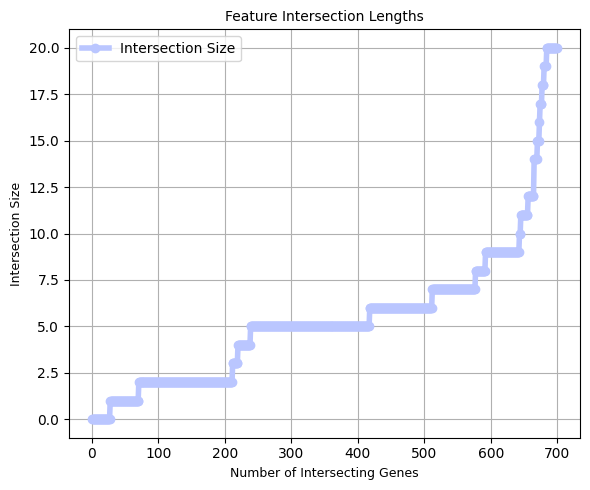

Feature importance bar plot saved to ../results/plots\all_cells_feature_importance_barplot.png.


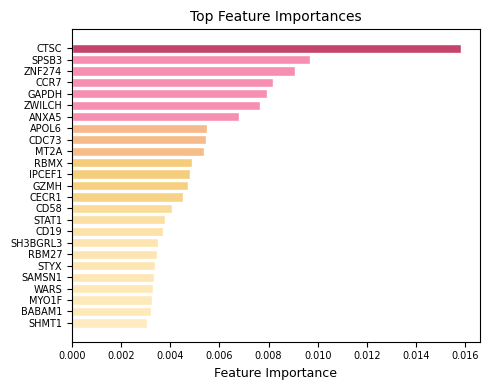

In [7]:
precise.create_feature_plots(700)

In [8]:
top_features = precise.choose_top_features(10)
top_features

['SH3BGRL3',
 'LAMTOR4',
 'WARS',
 'GAPDH',
 'IFITM2',
 'DOCK8',
 'HLA-B',
 'SPSB3',
 'GZMH',
 'TMSB10',
 'BCL2L1']

## SHAP Values Analysis

#### Using SHAP for gene expression anlysis, and further identification of most important genes

SHAP mean absolute values, and SHAP summary plots



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



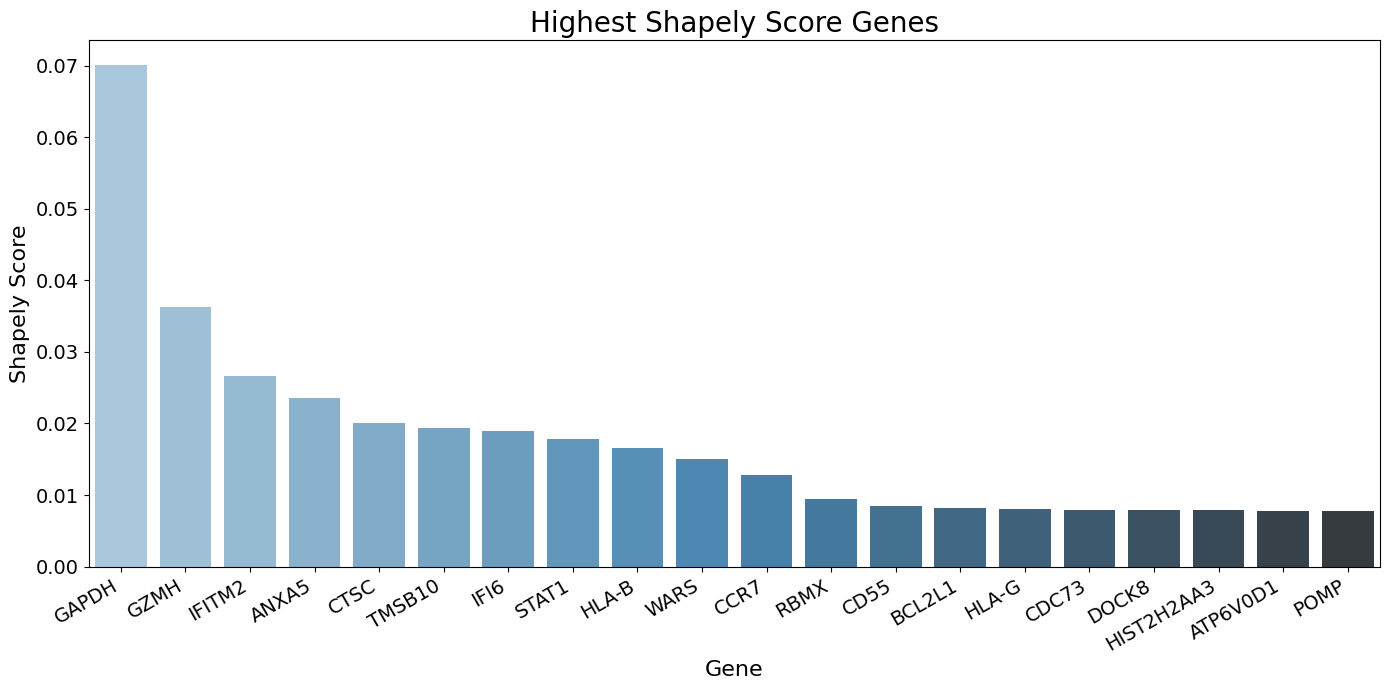

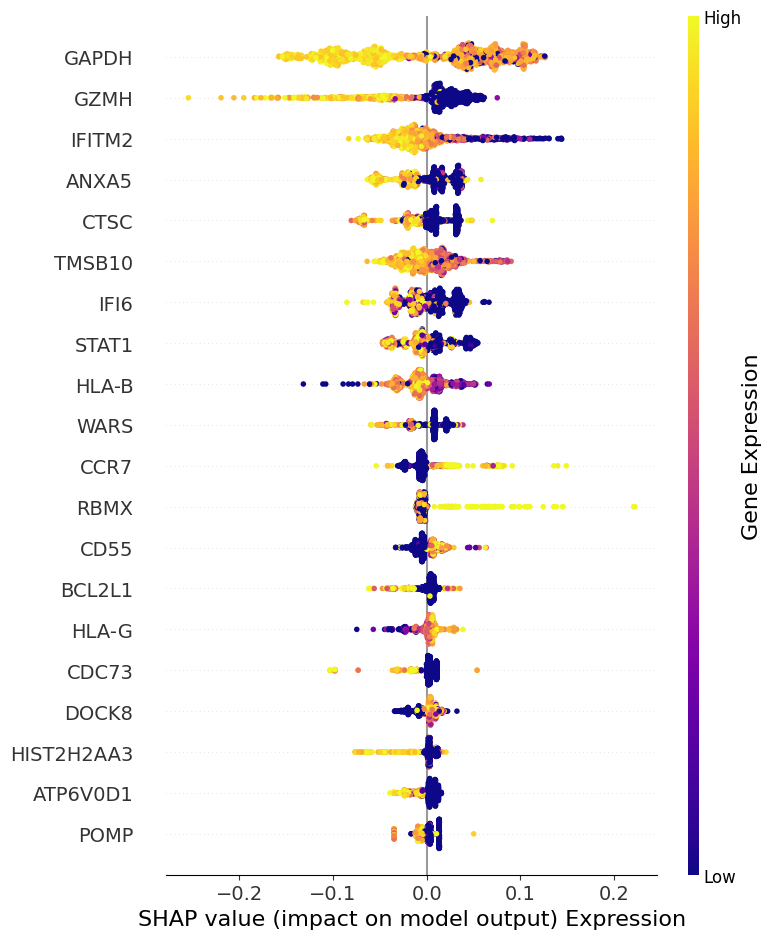

In [9]:
# precise.run_shap_visualizations(save_path='../results/plots')
precise.run_shap_visualizations()

##### We can look at individual samples and interprete the model's prediction to them

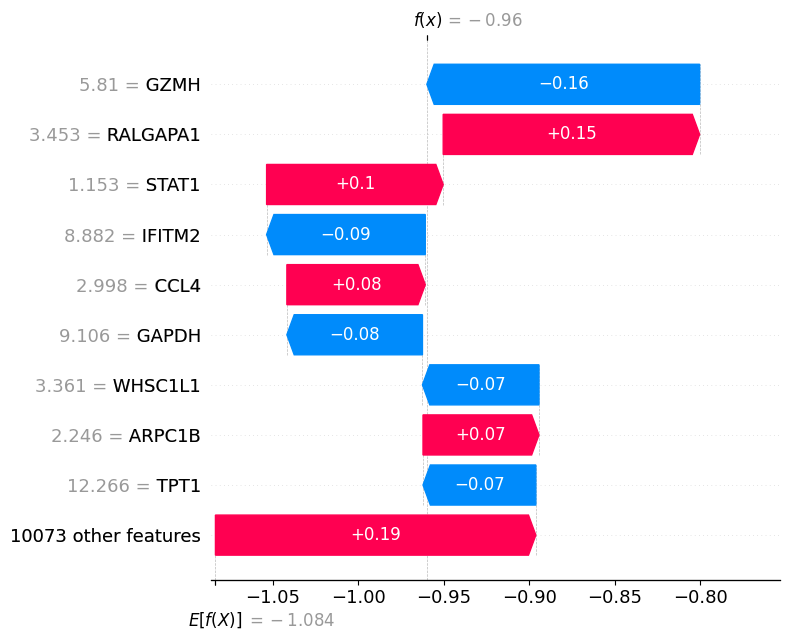

In [10]:
# precise.shap_visualizer.shap_waterfall_plot('Pre_P3', save_folder='../results/plots')
precise.shap_visualizer.shap_waterfall_plot('Pre_P3')

##### Using SHAP we can find gene-gene interactions for genes of interest

Dependence plot saved to ../results/plots/GAPDH_dependence.png


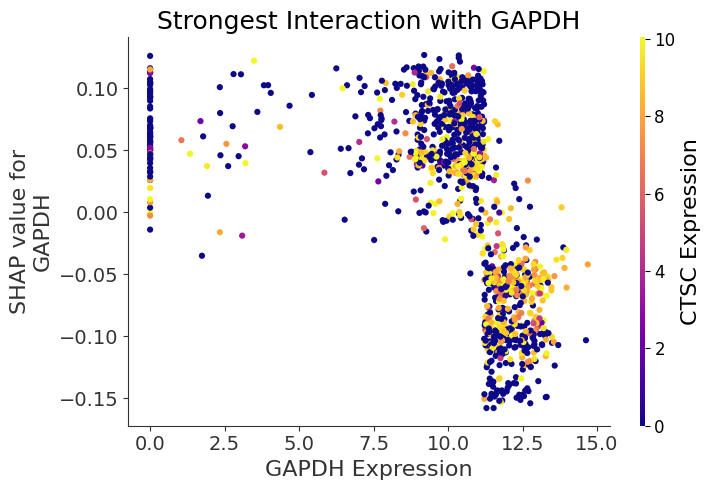

In [11]:
precise.shap_visualizer.shap_dependence_plot('GAPDH', save_path='../results/plots/GAPDH_dependence.png')

Subsetting the highly variable genes reduces the running time significantly. 
The RL class ignores this, as it uses a list of genes as input, but for boruta this is important. Note that this removes also informative genes.

In [12]:
precise.subset_highly_variable(2000)

Trying to modify attribute `.obs` of view, initializing view as actual.


## Boruta Feature Selection

In [13]:
boruta_results = precise.boruta_analyzer.run_boruta()

In the future `np.bool` will be defined as the corresponding NumPy scalar.


In [14]:
_, chosen_genes_dict, _ = boruta_results
chosen_genes_dict

{'confirmed': ['TGFBI', 'ZNHIT2'], 'tentative': ['EXO5']}

In [15]:
chosen_genes_dict = {'confirmed': ['TGFBI', 'ZNHIT2'], 'tentative': ['EXO5']}

##### Boruta can also be run directly through BorutaAnalyzer

In [16]:
# Get the unique samples
samples = list(adata.obs['sample'].unique())

# Shuffle the samples to randomize
random.shuffle(samples)

# Split into 70% train and 30% test
split_idx = int(0.7 * len(samples))
train_samples = samples[:split_idx]

# Subset the AnnData object
train_adata = adata[adata.obs['sample'].isin(train_samples)]
test_adata = adata[~adata.obs['sample'].isin(train_samples)]

# Run Boruta analysis
boruta_analyzer = BorutaAnalyzer(train_adata, model=precise.model, model_name=precise.model_name, verbose=False)
boruta_results = boruta_analyzer.run_boruta(test_adata=test_adata)


Trying to modify attribute `.obs` of view, initializing view as actual.
Trying to modify attribute `.obs` of view, initializing view as actual.


In [17]:
boruta_results

(None,
 {'confirmed': ['PLA2G16', 'MUM1', 'HLA-DQA2', 'CCR7'],
  'tentative': ['GOLPH3', 'UBA7', 'HSPA1B', 'IPCEF1', 'UBE2J2']},
 {'Post_P4': 0.16,
  'Post_P5_2': 0.12,
  'Post_P8': 0.24,
  'Post_P12': 0.0,
  'Post_P15': 0.16,
  'Post_P21': 0.12,
  'Post_P23': 0.16,
  'Post_P23_2': 0.0,
  'Post_P28': 0.04,
  'Pre_P12': 0.04,
  'Pre_P20': 0.12,
  'Pre_P24': 0.04,
  'Pre_P25': 0.04,
  'Pre_P28': 0.12,
  'Pre_P33': 0.2})

## Reinforcement Learning for Cell-Level Predictivity Scores

Passing a list of robust genes to RL is a must, as it reduces significantly the running time and when using a good gene subset (e.g. as extracted by LOO) it improves the distribution of predictive labels in the cohort.

In [18]:
precise = Precise(
    adata,
    model_name='XGBoostClassifier',
    output_dir=output_dir,
    target_column="response",  # Adjust based on your dataset
    sample_column="sample"
)
# we can combine the features from boruta and the features from the LOO, and train the RL model using them
chosen_features = list(set(top_features + chosen_genes_dict['confirmed']))
rl_adata = precise.run_reinforcement_learning(chosen_features = chosen_features, n_iters = 50, verbose=True)

Starting RL iterations with 1200 cells and 13 features.
Iteration 1/50


Trying to modify attribute `.obs` of view, initializing view as actual.


Iteration 2/50
Iteration 3/50
Iteration 4/50
Iteration 5/50
Iteration 6/50
Iteration 7/50
Iteration 8/50
Iteration 9/50
Iteration 10/50
Iteration 11/50
Iteration 12/50
Iteration 13/50
Iteration 14/50
Iteration 15/50
Iteration 16/50
Iteration 17/50
Iteration 18/50
Iteration 19/50
Iteration 20/50
Iteration 21/50
Iteration 22/50
Iteration 23/50
Iteration 24/50
Iteration 25/50
Iteration 26/50
Iteration 27/50
Iteration 28/50
Iteration 29/50
Iteration 30/50
Iteration 31/50
Iteration 32/50
Iteration 33/50
Iteration 34/50
Iteration 35/50
Iteration 36/50
Iteration 37/50
Iteration 38/50
Iteration 39/50
Iteration 40/50
Iteration 41/50
Iteration 42/50
Iteration 43/50
Iteration 44/50
Iteration 45/50
Iteration 46/50
Iteration 47/50
Iteration 48/50
Iteration 49/50
Iteration 50/50
Results saved to ../results/


Plot saved at ../results/plots\rl_labels_hist_49.png


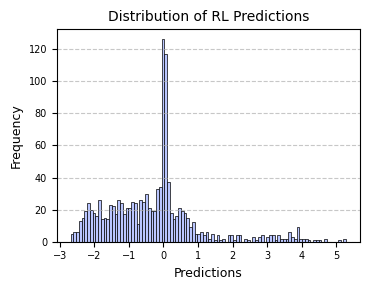

In [19]:
labels = precise.get_rl_distribution(49)
adata.obs['RL_labels'] = labels

In [20]:
sc.tl.tsne(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


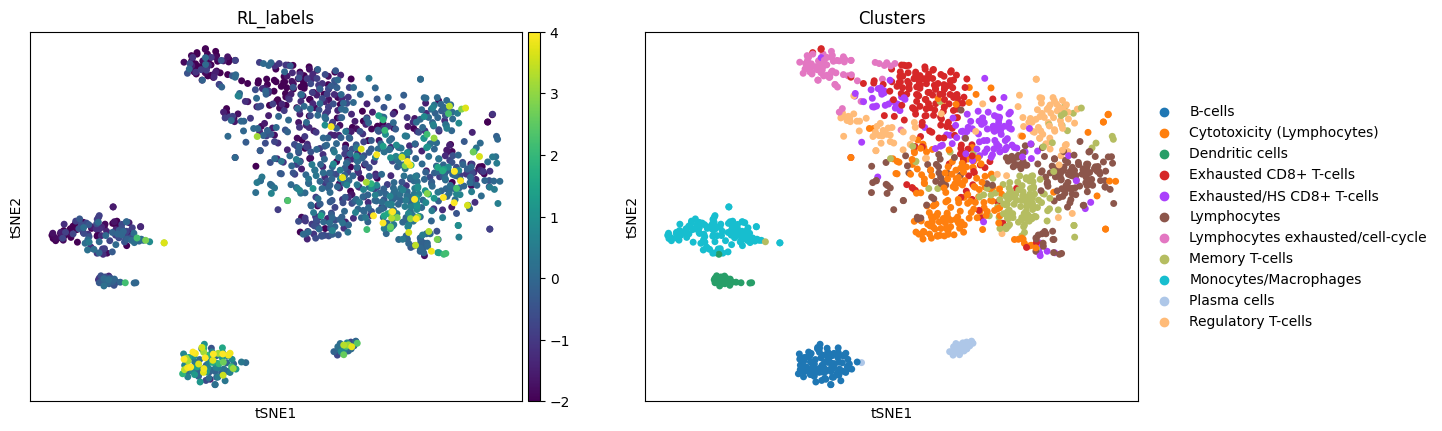

In [21]:
group_annotations = {
    "1": "B-cells",
    "2": "Plasma cells",
    "3": "Monocytes/Macrophages",
    "4": "Dendritic cells",
    "5": "Lymphocytes",
    "6": "Exhausted CD8+ T-cells",
    "7": "Regulatory T-cells",
    "8": "Cytotoxicity (Lymphocytes)",
    "9": "Exhausted/HS CD8+ T-cells",
    "10": "Memory T-cells",
    "11": "Lymphocytes exhausted/cell-cycle"
}

adata.obs['Clusters'] = [group_annotations[cluster] for cluster in adata.obs['cluster']]
sc.pl.tsne(adata, color=['RL_labels', 'Clusters'], vmax = 4, vmin = -2)
# sc.pl.tsne(adata, color='Clusters')

### Subsetting a cell type
Precise supports subsetting by cell type. The cell type should be specified as a boolean or 0/1 column in .obs. This approach (instead of a single 'cell_type' column) allows overlapping cell types to be analyzed (e.g., T cells and CD8 T cells).

In [4]:
# The data can be filtered by cell type
# Make sure an obs columns with the chosen cell type (e.g., "T cells") exists (bool or 0/1)
tcell_precise = Precise(
    adata,
    model_name='XGBoostClassifier',
    output_dir=output_dir,
    target_column="response",  # Adjust based on your dataset
    sample_column="sample",
    celltype="T cells",  # Specify the cell type if needed
)

In [6]:
tcell_prediction_results = tcell_precise.cv_prediction(k_folds=5, verbose=True)

Filtering for cell type: T cells.
Starting LOO Prediction with 794 cells and 10082 features.
Sample column: sample, Target column: response.
Using 5-Fold cross-validation with stratification.

=== Fold 1 ===
Processed 10 samples
Sample	Label	Score
Post_P1	1.0	0.2000
Post_P4	1.0	0.2143
Post_P10	0.0	0.1667
Post_P13	0.0	0.3333
Post_P16	0.0	0.0000
Pre_P1	1.0	0.1176
Pre_P4	0.0	0.1667
Pre_P15	0.0	0.0476
Pre_P27	0.0	0.0000
Pre_P33	1.0	0.5000

=== Fold 2 ===
Processed 10 samples
Sample	Label	Score
Post_P5	0.0	0.2222
Post_P5_2	1.0	0.2000
Post_P6	0.0	0.0000
Post_P12	0.0	0.0455
Post_P14	0.0	0.0000
Post_P28	0.0	0.0000
Pre_P20	0.0	0.1000
Pre_P24	1.0	0.2857
Pre_P26	1.0	0.3077
Pre_P35	1.0	0.2500

=== Fold 3 ===
Processed 10 samples
Sample	Label	Score
Post_P1_2	0.0	0.0625
Post_P11	0.0	0.2222
Post_P19	1.0	0.2308
Post_P20	0.0	0.0500
Post_P22	0.0	0.2000
Post_P23	0.0	0.0952
Post_P23_2	0.0	0.0500
Post_P28_2	0.0	0.0000
Pre_P7	1.0	0.3750
Pre_P28	1.0	0.1176

=== Fold 4 ===
Processed 9 samples
Sample	Label	Sco

In [5]:
tcell_boruta_results = tcell_precise.run_boruta(verbose=True)

Filtering for cell type: T cells.
Selecting features with 794 cells from 48 samples.


In the future `np.bool` will be defined as the corresponding NumPy scalar.


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10082
Rejected: 	0


KeyboardInterrupt: 

In [ ]:
tcell_boruta_results